# <font color = blue> Credit EDA Case Study </font>
When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile, using the data sets given below.

The objective is to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.



Data Sets

1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

In [61]:
# Importing required libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Filtering out the warnings
warnings.filterwarnings('ignore')

##  Task 1: Reading the data

- ### Subtask 1.1: Reading the loan application Data.

Read the loan application data file provided and store it in a dataframe `df_app_data`.

In [182]:
# reading the loan application data CSV file using pandas read_csv method.
df_app_data = pd.read_csv('application_data.csv')

# Set option to display all the rows and colums without limit
pd.set_option('display.max_columns', None, 'display.max_rows', None)
df_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [183]:
# Check the number of rows and columns in the dataframe
df_app_data.shape

(307511, 122)

In [184]:
# Check the column-wise info of the dataframe
df_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [185]:
# Check the column-wise null counts in the dataframe
df_app_data.isnull().sum() #.sort_values(axis=0, ascending=True)

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [186]:
# Check the summary for the numeric columns 
df_app_data.describe(include = 'all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,97216,153214,159080.000000,151170,161756,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

## Task 2: Cleaning the Data

Now that we have loaded the dataset and inspected it, we will do the data cleansing. 


- ###  Subtask 2.1: Drop unnecessary columns

Drop columns that are not required for our analysis.

In [187]:
# Creating copy of original data frame 
df1 = df_app_data

In [188]:
# Drop columns that are not required
df1.drop('NAME_TYPE_SUITE',axis=1,inplace=True)
df1.drop('REGION_POPULATION_RELATIVE',axis=1,inplace=True)
df1.drop(df1.loc[:, 'FLAG_MOBIL':'FLAG_EMAIL'].columns,axis = 1,inplace=True)
df1.drop('WEEKDAY_APPR_PROCESS_START',axis=1,inplace=True)
df1.drop('HOUR_APPR_PROCESS_START',axis=1,inplace=True)
df1.drop(df1.loc[:, 'APARTMENTS_AVG':'EMERGENCYSTATE_MODE'].columns,axis = 1,inplace=True)
df1.drop(df1.loc[:, 'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].columns,axis = 1,inplace=True)
df1.drop(df1.loc[:, 'EXT_SOURCE_1':'EXT_SOURCE_3'].columns,axis = 1,inplace=True)

In [189]:
# Check the shape of the dataframe after dropping unnecessary columns
df1.shape

(307511, 42)

In [190]:
# Check the percentage of missing values
(df1.isnull().sum()* 100 / len(df1)).round(2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                    65.99
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
LIVE_REGION_NOT_WORK_REGION     0.00
R

In [191]:
# Droping column as the null values are more (65% of values are null)
df1.drop('OWN_CAR_AGE',axis=1,inplace=True)

In [192]:
df1.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGI

- ###  Subtask 2.2: Check Data Redundancies 

In [193]:
# Check distinct values of each column of object type to see if any data redundancies/ identical rows.

In [194]:
df1['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [195]:
df1['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [196]:
df1['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [197]:
df1['FLAG_OWN_REALTY'].value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [198]:
df1['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [199]:
df1['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [200]:
df1['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [201]:
df1['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [202]:
df1['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [203]:
df1['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

- ###  Subtask 2.3: Fixing Invalid Values and Filter Data

In [204]:
# Convert XNA to missing value
df1.loc[df1.CODE_GENDER == 'XNA',['CODE_GENDER']] = np.nan
df1.loc[df1.ORGANIZATION_TYPE == 'XNA',['ORGANIZATION_TYPE']] = np.nan

In [205]:
# Convert all days columns to positive. As all days are mentioned with negative values, which is incorrect.
df1[['DAYS_BIRTH','DAYS_EMPLOYED',
   'DAYS_REGISTRATION','DAYS_ID_PUBLISH']] = df1[['DAYS_BIRTH','DAYS_EMPLOYED',
                                               'DAYS_REGISTRATION','DAYS_ID_PUBLISH']].abs()

- ###  Subtask 2.4: Impute missing values

In [206]:
# Impute the missing values with 0.0. We can assume no enquiries were made for those missing values. 
df1[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
     'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']] = df1[['OBS_30_CNT_SOCIAL_CIRCLE',
                                                                    'DEF_30_CNT_SOCIAL_CIRCLE',
                                                                    'OBS_60_CNT_SOCIAL_CIRCLE',
                                                                    'DEF_60_CNT_SOCIAL_CIRCLE']].fillna(value=0.0)

In [207]:
# Impute the missing values with 0.0. We can assume no enquiries were made for those missing values. 

df1[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
     'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']] = df1[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
     'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].fillna(value=0.0)

In [208]:
# Impute missing values with mode value for "Occupation Type"

mode_OccupationType  = df1.OCCUPATION_TYPE.mode()
df1["OCCUPATION_TYPE"].fillna(mode_OccupationType[0], inplace=True)

In [209]:
# Impute missing values with mode value for "CODE_GENDER" & "ORGANIZATION_TYPE"

df1["CODE_GENDER"].fillna(df1.CODE_GENDER.mode()[0], inplace=True)
df1["ORGANIZATION_TYPE"].fillna(df1.ORGANIZATION_TYPE.mode()[0], inplace=True)

In [210]:
# Impute missing values with median value for "AMT_ANNUITY" & "AMT_GOODS_PRICE"

df1["AMT_ANNUITY"].fillna(df1["AMT_ANNUITY"].median(), inplace=True)
df1["AMT_GOODS_PRICE"].fillna(df1["AMT_GOODS_PRICE"].median(), inplace=True)

In [211]:
# Again check the percentage of missing values
df1.isnull().sum().sort_values(ascending = False)

CNT_FAM_MEMBERS                2
DAYS_LAST_PHONE_CHANGE         1
AMT_ANNUITY                    0
DAYS_REGISTRATION              0
DAYS_EMPLOYED                  0
DAYS_BIRTH                     0
NAME_HOUSING_TYPE              0
NAME_FAMILY_STATUS             0
NAME_EDUCATION_TYPE            0
NAME_INCOME_TYPE               0
AMT_GOODS_PRICE                0
AMT_CREDIT                     0
OCCUPATION_TYPE                0
AMT_INCOME_TOTAL               0
CNT_CHILDREN                   0
FLAG_OWN_REALTY                0
FLAG_OWN_CAR                   0
CODE_GENDER                    0
NAME_CONTRACT_TYPE             0
TARGET                         0
DAYS_ID_PUBLISH                0
AMT_REQ_CREDIT_BUREAU_YEAR     0
AMT_REQ_CREDIT_BUREAU_QRT      0
OBS_30_CNT_SOCIAL_CIRCLE       0
AMT_REQ_CREDIT_BUREAU_MON      0
AMT_REQ_CREDIT_BUREAU_WEEK     0
AMT_REQ_CREDIT_BUREAU_DAY      0
AMT_REQ_CREDIT_BUREAU_HOUR     0
DEF_60_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT

- ###  Subtask 2.5: Detecting Outliers

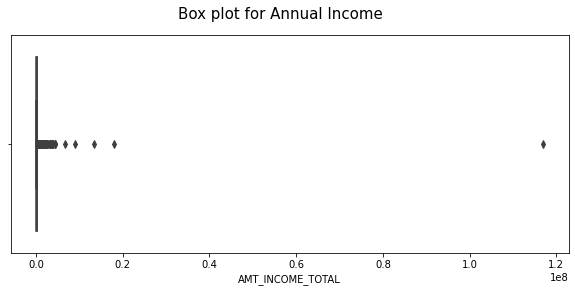

In [212]:
# Outliers in AMT_INCOME_TOTAL column
plt.figure(figsize=(10,4))
sns.boxplot(df1.AMT_INCOME_TOTAL)
plt.suptitle('Box plot for Annual Income',fontsize=15)
plt.show()

In [213]:
df1['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [214]:
# Upper Limit
Q1= df1['AMT_INCOME_TOTAL'].quantile(0.25)
Q3= df1['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1
UpperLimit = Q3+1.5*IQR
df1 = df1[df1['AMT_INCOME_TOTAL']< UpperLimit]

### Observations:
1. We can observe few outliers.
2. The outliers range is very far from the IQR .

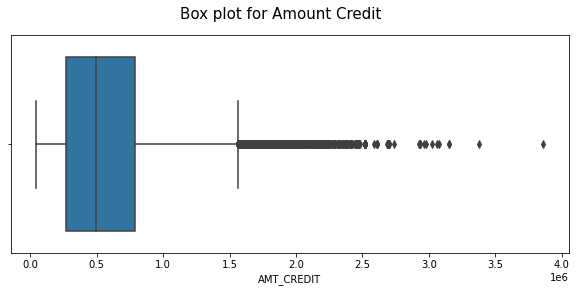

In [215]:
# Outliers in AMT_CREDIT column
plt.figure(figsize=(10,4))
sns.boxplot(df1.AMT_CREDIT)
plt.suptitle('Box plot for Amount Credit',fontsize=15)

plt.show()

In [216]:
df1['AMT_CREDIT'].describe()

count    2.916860e+05
mean     5.777803e+05
std      3.830254e+05
min      4.500000e+04
25%      2.700000e+05
50%      4.975200e+05
75%      7.871310e+05
max      3.860019e+06
Name: AMT_CREDIT, dtype: float64

In [222]:
# Upper Limit
Q1= df1['AMT_CREDIT'].quantile(0.25)
Q3= df1['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
UpperLimit = Q3+1.5*IQR
df1 = df1[df1['AMT_CREDIT']< UpperLimit]
df1['AMT_CREDIT'].describe()

count    2.860240e+05
mean     5.528802e+05
std      3.413372e+05
min      4.500000e+04
25%      2.700000e+05
50%      4.932045e+05
75%      7.662825e+05
max      1.562076e+06
Name: AMT_CREDIT, dtype: float64

### Observations:
We can observe few outliers.

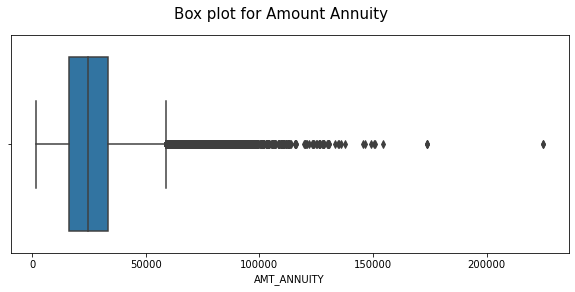

In [218]:
# Outliers in AMT_ANNUITY column
plt.figure(figsize=(10,4))
sns.boxplot(df1.AMT_ANNUITY)
plt.suptitle('Box plot for Amount Annuity',fontsize=15)
plt.show()

In [219]:
df1['AMT_ANNUITY'].describe()

count    291686.000000
mean      26172.456254
std       13353.061413
min        1615.500000
25%       16200.000000
50%       24331.500000
75%       33246.000000
max      225000.000000
Name: AMT_ANNUITY, dtype: float64

In [223]:
# Upper Limit
Q1= df1['AMT_ANNUITY'].quantile(0.25)
Q3= df1['AMT_ANNUITY'].quantile(0.75)
IQR = Q3 - Q1
UpperLimit = Q3+1.5*IQR
df1 = df1[df1['AMT_ANNUITY']< UpperLimit]
df1['AMT_ANNUITY'].describe()

count    281247.000000
mean      24854.650204
std       11391.175278
min        1615.500000
25%       16011.000000
50%       23773.500000
75%       32017.500000
max       57366.000000
Name: AMT_ANNUITY, dtype: float64

### Observations:
We can observe more outliers in Amount Annuity.

## Task 3: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

In [224]:
# Calculating Age of Applicants, by creating a new column "Age"

df1["Age"] = (df1["DAYS_BIRTH"] / 365).astype(int)

we will divide the application dataset into two different dataframes based on target variable's value.

In [225]:
df1_t0 =df1[df1.TARGET==0]
df1_t1=df1[df1.TARGET==1]

- ###  Subtask 3.1: Imbalance in Dataframe

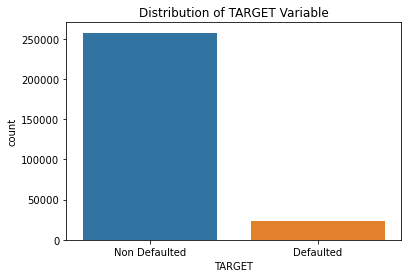

Imbalance :  11.04


In [226]:
#checking the distribution of target variable
imbalance = round(len(df1_t0)/len(df1_t1),2)
c = sns.countplot(df1["TARGET"])
c.set_xticklabels(['Non Defaulted','Defaulted'])
plt.title("Distribution of TARGET Variable")
plt.show()
print("Imbalance : ",imbalance)

- ###  Subtask 3.2: Binning of continuous variables


In [227]:
df1_t0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
count,257879.000000,257879.0,257879.000000,257879.000000,2.578790e+05,257879.000000,2.578790e+05,257879.000000,257879.000000,257879.000000,257879.000000,257878.000000,257879.000000,257879.000000,257879.000000,257879.000000,257879.000000,257879.000000,257879.000000,257879.000000,257879.000000,257879.000000,257879.000000,257879.000000,257878.000000,257879.000000,257879.000000,257879.000000,257879.000000,257879.000000,257879.000000,257879.000000
mean,278230.744237,0.0,0.409304,150791.870094,5.469092e+05,24823.718096,4.897921e+05,16155.114294,72677.805327,5072.735795,3020.116299,2.139865,2.067501,2.047654,0.013095,0.043982,0.035094,0.074950,0.225400,0.176288,1.429628,0.142055,1.412628,0.099077,-968.984213,0.005553,0.005956,0.029541,0.224877,0.228471,1.644515,43.759418
std,102839.978900,0.0,0.716611,61495.470382,3.398649e+05,11444.474601,3.071933e+05,4419.649273,143394.662866,3548.592576,1504.069430,0.907913,0.490978,0.484776,0.113683,0.205055,0.184018,0.263311,0.417846,0.381066,2.421773,0.444829,2.400522,0.360342,826.501790,0.078077,0.102831,0.190261,0.843109,0.574285,1.852860,12.106794
min,100003.000000,0.0,0.000000,25650.000000,4.500000e+04,1615.500000,4.050000e+04,7489.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,189004.500000,0.0,0.000000,112500.000000,2.695500e+05,15867.000000,2.250000e+05,12474.000000,957.000000,2096.000000,1761.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1577.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000
50%,278375.000000,0.0,0.000000,135000.000000,4.856400e+05,23773.500000,4.500000e+05,15892.000000,2303.000000,4579.000000,3301.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-769.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.000000
75%,367126.500000,0.0,1.000000,180000.000000,7.602255e+05,32053.500000,6.750000e+05,19885.000000,6430.000000,7609.000000,4313.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,-278.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,54.000000
max,456255.000000,0.0,19.000000,337050.000000,1.562076e+06,57366.000000,1.561500e+06,25201.000000,365243.000000,24672.000000,7197.000000,20.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,24.000000,8.000000,25.000000,69.000000


In [228]:
df1_t1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
count,23368.000000,23368.0,23368.000000,23368.000000,2.336800e+04,23368.000000,2.336800e+04,23368.000000,23368.000000,23368.000000,23368.000000,23368.000000,23368.000000,23368.000000,23368.000000,23368.000000,23368.000000,23368.000000,23368.000000,23368.000000,23368.000000,23368.00000,23368.000000,23368.000000,23368.000000,23368.000000,23368.000000,23368.000000,23368.000000,23368.000000,23368.000000,23368.000000
mean,277735.227619,1.0,0.463454,148604.389678,5.282229e+05,25196.003381,4.612671e+05,14864.480828,46693.114772,4503.436109,2732.234765,2.178064,2.165953,2.148579,0.015834,0.051309,0.038985,0.119094,0.305075,0.222569,1.496919,0.19454,1.478047,0.140149,-799.096414,0.005264,0.006462,0.028629,0.182686,0.213882,1.678192,40.225009
std,102392.046584,0.0,0.756953,58983.652587,3.066722e+05,10779.849914,2.721183e+05,4216.372376,119589.888229,3302.739755,1515.776692,0.952235,0.497025,0.491992,0.124834,0.220633,0.193563,0.323907,0.460449,0.415980,2.378253,0.52046,2.355570,0.431166,751.552354,0.075260,0.096150,0.186166,0.664924,0.592424,1.921803,11.548341
min,100002.000000,1.0,0.000000,27000.000000,4.500000e+04,2722.500000,4.500000e+04,7678.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-4070.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,190022.250000,1.0,0.000000,112500.000000,2.786130e+05,17019.000000,2.295000e+05,11354.750000,675.000000,1687.000000,1388.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-1280.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000
50%,276444.000000,1.0,0.000000,135000.000000,4.736610e+05,24543.000000,4.500000e+05,14240.000000,1453.000000,4064.500000,2795.500000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-586.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,39.000000
75%,366234.250000,1.0,1.000000,180000.000000,6.750000e+05,31653.000000,6.536250e+05,18044.250000,3301.000000,6660.250000,4117.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.00000,2.000000,0.000000,-190.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,49.000000
max,456254.000000,1.0,11.000000,336825.000000,1.560726e+06,57352.500000,1.552500e+06,25168.000000,365243.000000,22928.000000,6207.000000,13.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,6.00000,29.000000,5.000000,0.000000,2.000000,4.000000,6.000000,17.000000,19.000000,22.000000,68.000000


In [229]:
# Binning the AMT_INCOME_TOTAL column into low, medium, high, very high values for both the dataframes.
df1_t0.loc[:,'INCOME_RANGE'] = pd.qcut(df1_t0.loc[:,'AMT_INCOME_TOTAL'], q=4,labels=['Low','Medium','High','Very High'])

df1_t1.loc[:,'INCOME_RANGE'] = pd.qcut(df1_t1.loc[:,'AMT_INCOME_TOTAL'], q=4,labels=['Low','Medium','High','Very High'])
print(df1_t0['INCOME_RANGE'].value_counts(), df1_t1['INCOME_RANGE'].value_counts())

Low          91778
Very High    63680
High         58341
Medium       44080
Name: INCOME_RANGE, dtype: int64 Low          8416
High         5539
Very High    5301
Medium       4112
Name: INCOME_RANGE, dtype: int64


In [322]:
# Binning the AMT_ANNUITY column into low, medium, high, very high values.
df1_t0.loc[:,'ANNUITY_RANGE'] = pd.qcut(df1_t0.loc[:,'AMT_ANNUITY'], q=4,labels=['Low','Medium','High','Very High'])

df1_t1.loc[:,'ANNUITY_RANGE'] = pd.qcut(df1_t1.loc[:,'AMT_ANNUITY'], q=4,labels=['Low','Medium','High','Very High'])
print(df1_t0['ANNUITY_RANGE'].value_counts(), df1_t1['ANNUITY_RANGE'].value_counts())

Medium       65068
Low          64471
Very High    64458
High         63882
Name: ANNUITY_RANGE, dtype: int64 High         5881
Low          5861
Medium       5855
Very High    5771
Name: ANNUITY_RANGE, dtype: int64


In [323]:
# Binning the AMT_INCOME_TOTAL column into low, medium, high, very high values.
df1_t0.loc[:,'CREDIT_RANGE'] = pd.qcut(df1_t0.loc[:,'AMT_CREDIT'], q=4,labels=['Low','Medium','High','Very High'])

df1_t1.loc[:,'CREDIT_RANGE'] = pd.qcut(df1_t1.loc[:,'AMT_CREDIT'], q=4,labels=['Low','Medium','High','Very High'])
print(df1_t0['CREDIT_RANGE'].value_counts(), df1_t1['CREDIT_RANGE'].value_counts())

Low          65016
High         64291
Very High    64287
Medium       64285
Name: CREDIT_RANGE, dtype: int64 High         5879
Low          5846
Medium       5843
Very High    5800
Name: CREDIT_RANGE, dtype: int64


In [343]:
# Binning the Age column into low, medium, high, very high values.

df1_t0['AGE_RANGE'] = pd.cut(df1_t0.Age, bins=[0,19,39,59,100], 
                                  labels=["0-19", "20-39", "40-59","60-100"])

df1_t1['AGE_RANGE'] = pd.cut(df1_t1.Age, bins=[0,19,39,59,100], 
                                  labels=["0-19", "20-39", "40-59","60-100"])

print(df1_t0['AGE_RANGE'].value_counts(), df1_t1['AGE_RANGE'].value_counts())

40-59     121167
20-39     104525
60-100     32187
0-19           0
Name: AGE_RANGE, dtype: int64 20-39     12351
40-59      9341
60-100     1676
0-19          0
Name: AGE_RANGE, dtype: int64


- ###  Subtask 3.3: Univariate Analysis with respect to TAGET 0 and TARGET 1

In [328]:
# Define a function for plotting univariate graphs
def plotUnivariate(column):
    plt.figure(figsize=(15,7))
    plt.subplot(1, 2, 1)       
    sns.countplot(column, data=df1_t0)
    plt.title('Customers without payment difficulties', fontsize=14)
    plt.xlabel(column)
    plt.xticks(rotation=90)
    plt.ylabel('Count of non-defaulters')
    plt.subplot(1, 2, 2)
    sns.countplot(column, data=df1_t1)
    plt.title('Customers with payment difficulties', fontsize=14)
    plt.xlabel(column)
    plt.xticks(rotation=90)
    plt.ylabel('Count of defaulters')
    plt.show()

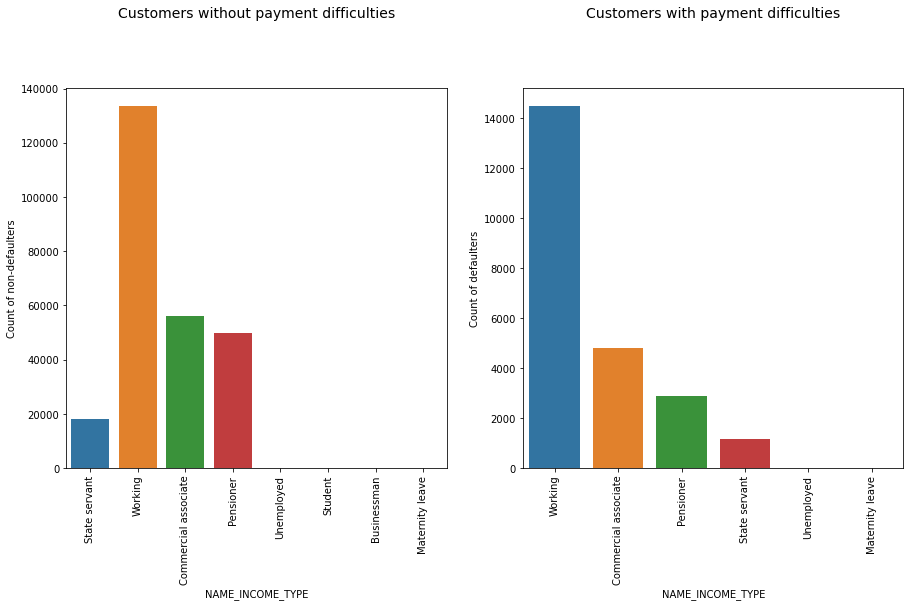

In [329]:
# Plot bar graph for NAME_INCOME_TYPE column
plotUnivariate('NAME_INCOME_TYPE')

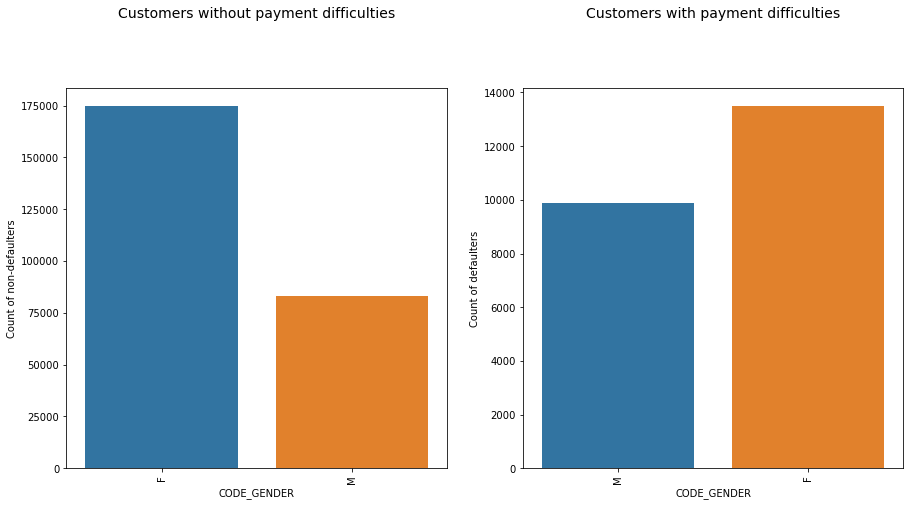

In [330]:
plotUnivariate('CODE_GENDER')

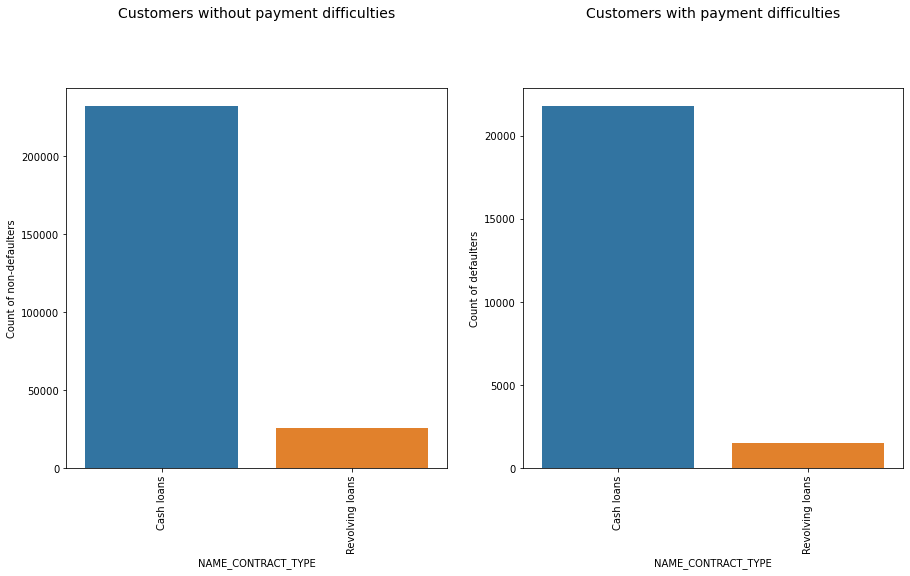

In [331]:
plotUnivariate('NAME_CONTRACT_TYPE')

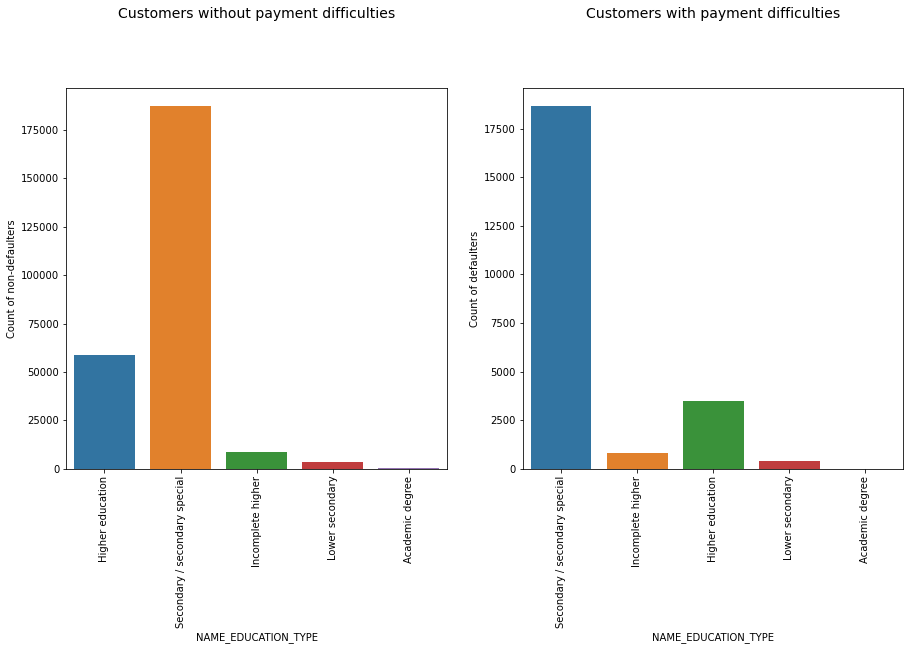

In [332]:
plotUnivariate('NAME_EDUCATION_TYPE')

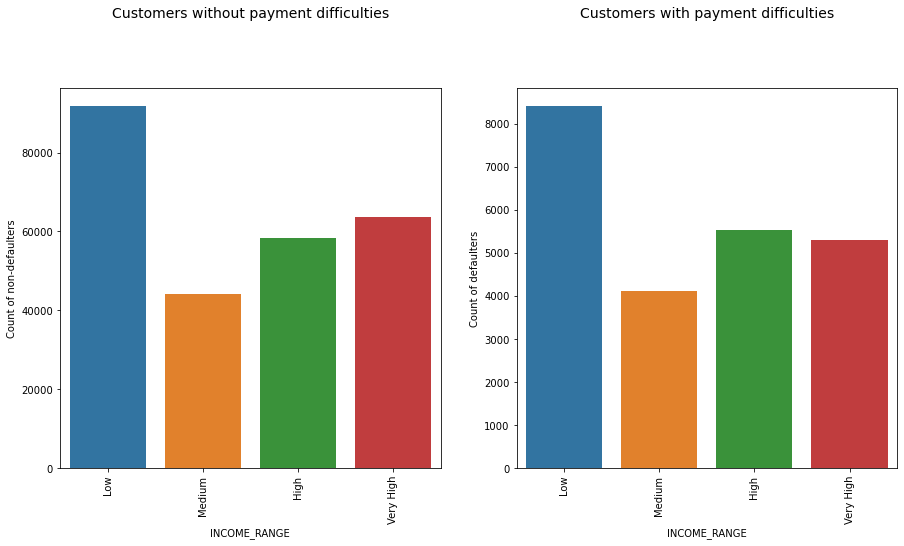

In [333]:
plotUnivariate('INCOME_RANGE')

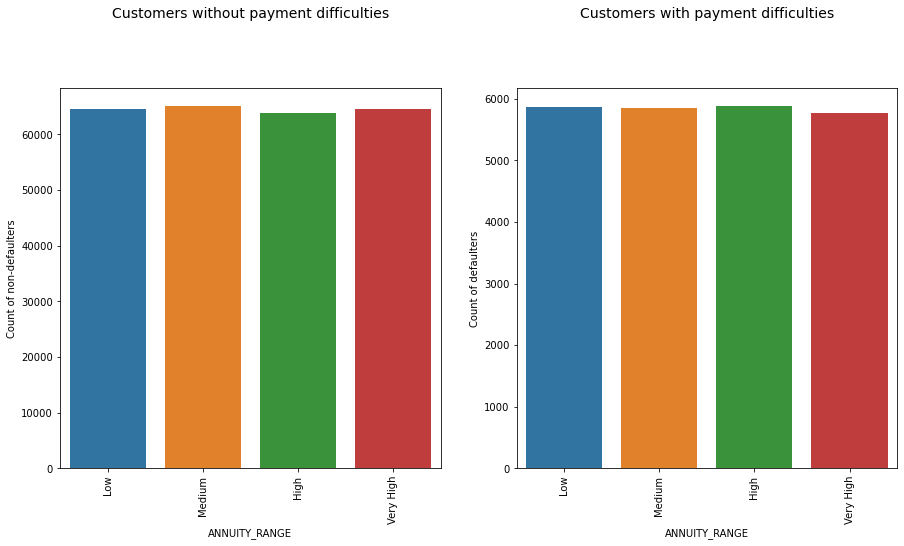

In [334]:
plotUnivariate('ANNUITY_RANGE')

### Observations:

1. People having high annuity amount are the most in defaulters.
2. People having high annuity amount are the most in non-defaulters.
3. This is very closely propotional graph.

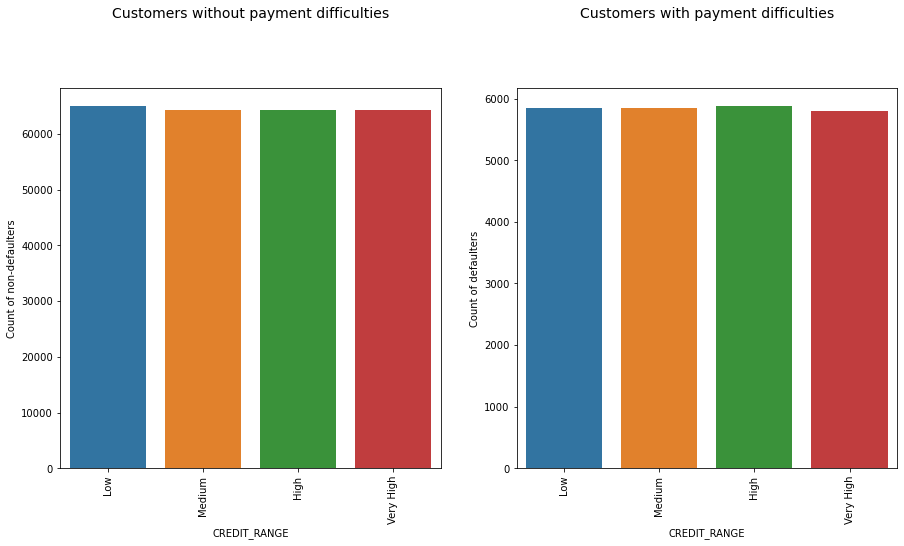

In [335]:
plotUnivariate('CREDIT_RANGE')

### Observations:
1. People having low credit amount are more in non-defaulters.
2. Whereas high credit amounted loans are the most in defaulters.

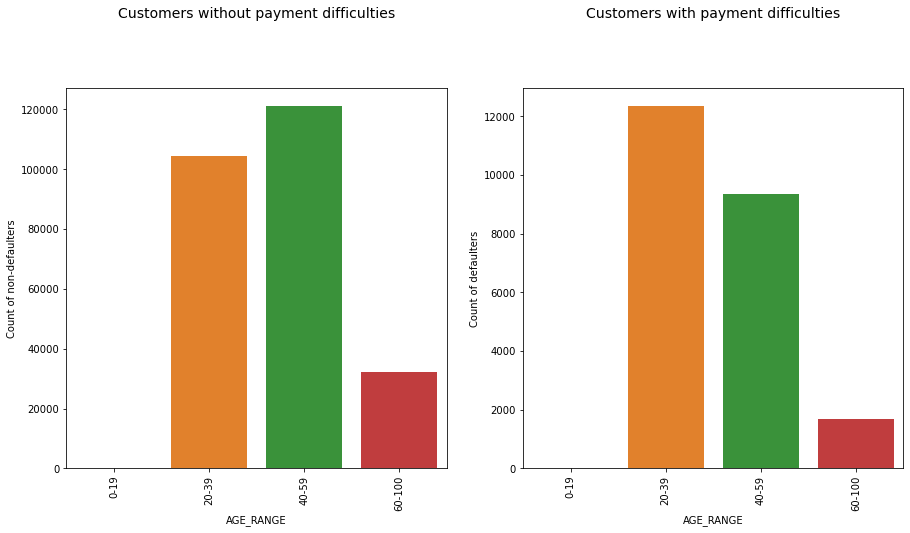

In [344]:
plotUnivariate('AGE_RANGE')

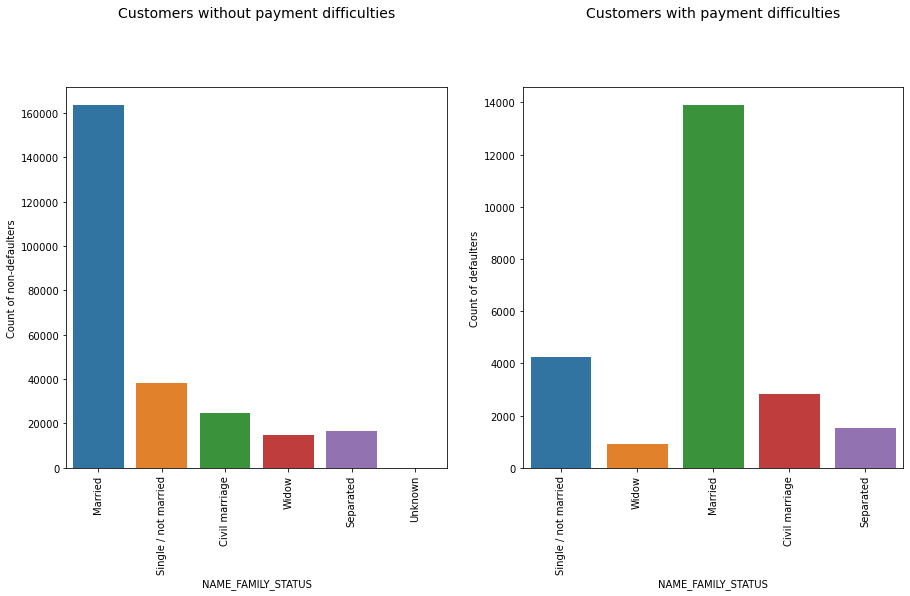

In [337]:
# Plot bar graph for NAME_FAMILY_STATUS column
plotUnivariate('NAME_FAMILY_STATUS')

### Observations:
1. There are more number of married people in the non-defaulters
2. There are more number of single/un-married people in defaulters

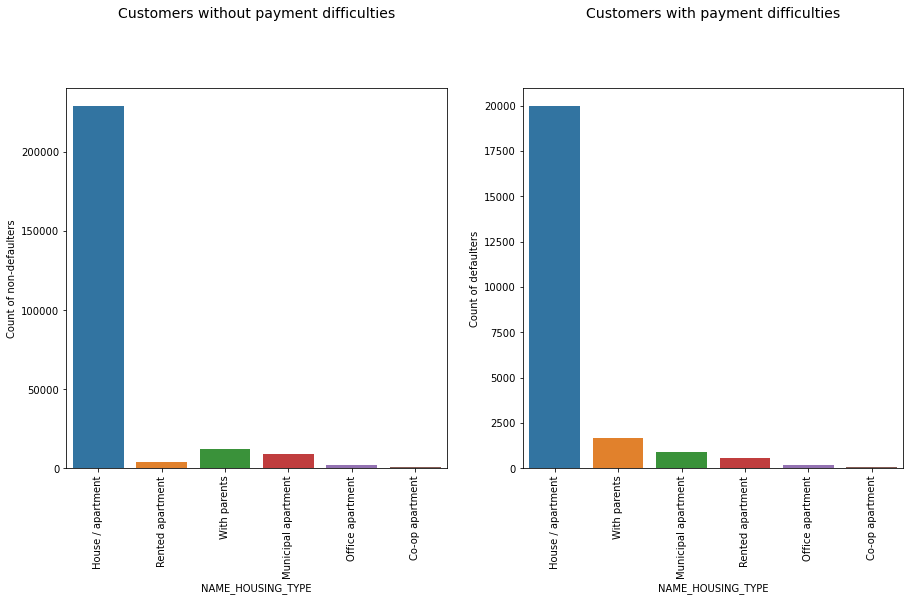

In [338]:
# Plot bar graph for NAME_HOUSING_TYPE column
plotUnivariate('NAME_HOUSING_TYPE')

### Observations:

1. People who live with their parents are more in defaulted population as compared to non-defaulted popluation.
2. Also people with rented appartment are more likely to default.
3. People owning a house/apartment certainly is more in non-defaulted inferring that they earn more so that they can repay the loan.



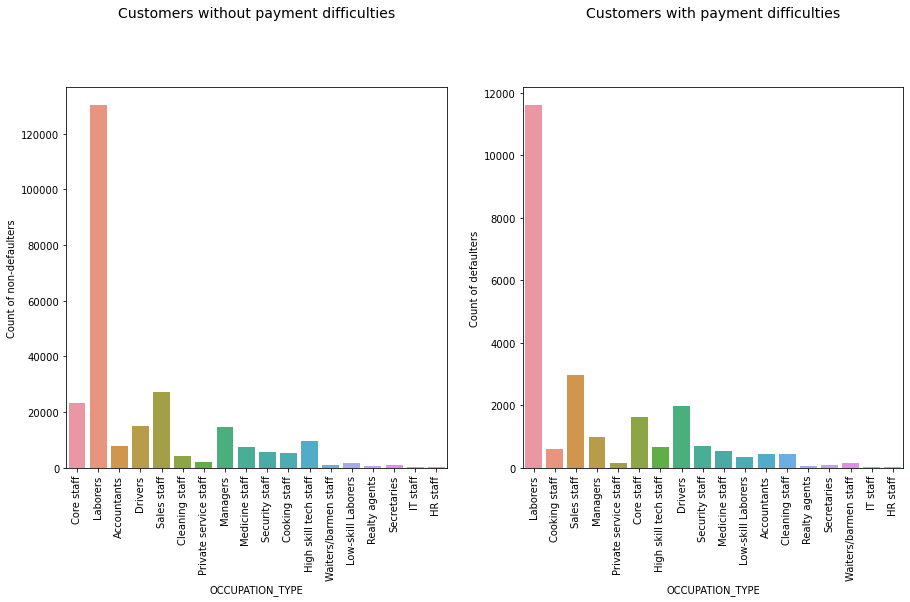

In [339]:
plotUnivariate('OCCUPATION_TYPE')

- ###  Segmented Univariate Analysis

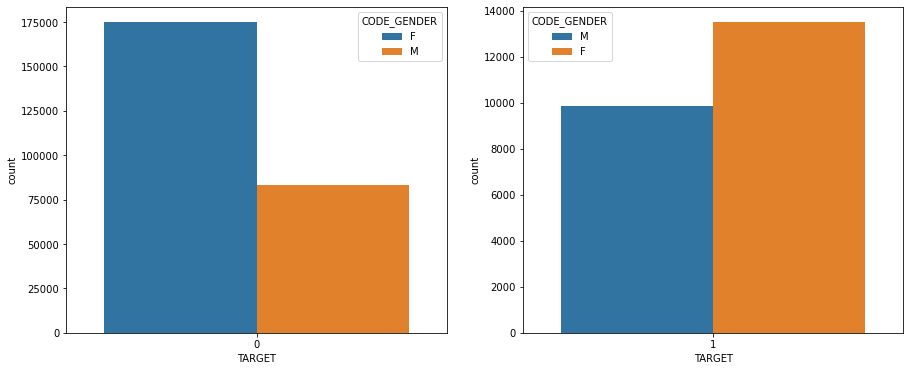

In [326]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=df1_t0)
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=df1_t1)
plt.show()

### Observations:

1. There are more Female Non-Defaulters and Defaulters , Hence the population Female Clients are relatively larger than Male Clients.
2. There are less Male Non-Defaulters and Defaulters , Hence the population Male Clients are relatively smaller than FeMale Clients.


- ###  Subtask 3.4: Bivariate Analysis

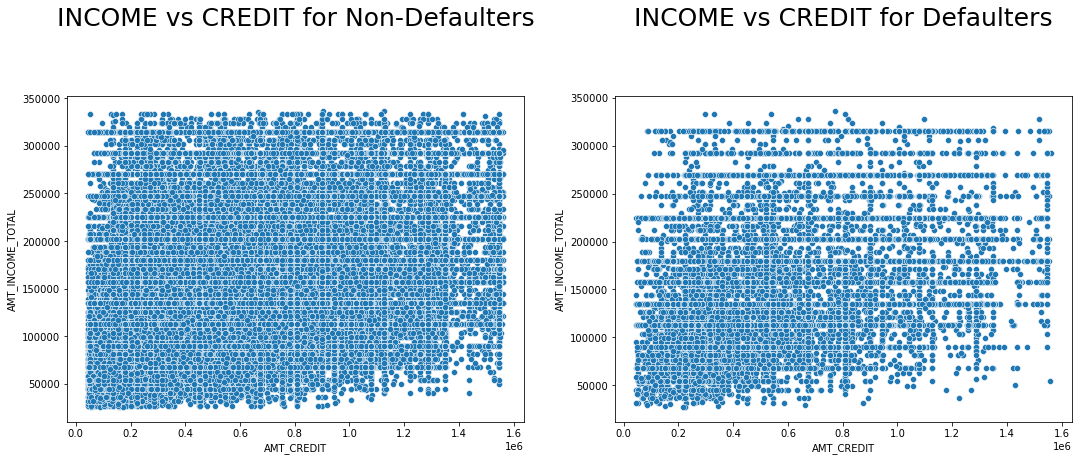

In [340]:
# Plot scatter plot for AMT_CREDIT vs AMT_INCOME_TOTAL for both the TARGET values
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL',data=df1_t0)
plt.title('INCOME vs CREDIT for Non-Defaulters')

plt.subplot(122)
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL',data=df1_t1)
plt.title('INCOME vs CREDIT for Defaulters')
plt.show()

### Observations:
Lower density is found among the defaulters where income is greater than 230k

Lesser the Income more number of Defaulters.

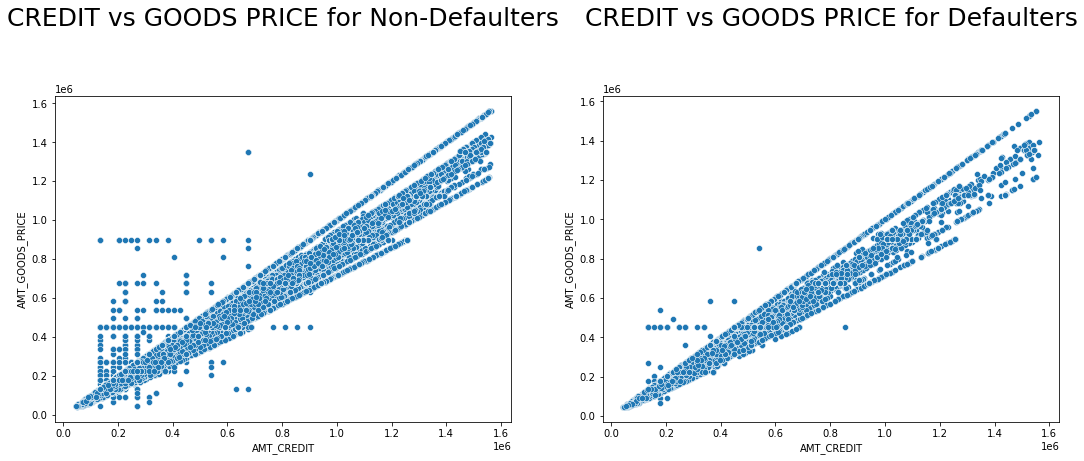

In [341]:
# Plot scatter plot for AMT_CREDIT vs AMT_GOODS_PRICE for both the TARGET values
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=df1_t0)
plt.title('CREDIT vs GOODS PRICE for Non-Defaulters')

plt.subplot(122)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=df1_t1)
plt.title('CREDIT vs GOODS PRICE for Defaulters')
plt.show()

### Observations:

There is a positive corelation between Credit Amount of Loan and Goods Price as we can see when one of the value increases the other also increases.

- ###  Subtask 3.5: Correlation Heatmap

In [257]:
# Find the correlation values of the columns and store in respective target0 and target1 dataframe
target0_corr=df1_t0.iloc[0:,2:29]
target1_corr=df1_t0.iloc[0:,2:29]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

In [258]:
target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,0.034390,-0.000036,0.022901,-0.004029,-0.379057,-0.212757,-0.184881,0.014468,0.806613,0.021808,0.020618,-0.011680,0.015331,0.021811,0.028482,0.080994,0.075885
AMT_INCOME_TOTAL,0.034390,1.000000,0.355456,0.422743,0.358102,-0.101283,-0.102376,-0.067954,-0.038084,0.034584,-0.165824,-0.183954,0.067784,0.143599,0.131852,0.024915,0.051365,0.048513
AMT_CREDIT,-0.000036,0.355456,1.000000,0.816606,0.982981,0.058287,0.018956,0.000090,0.003214,0.074182,-0.047964,-0.054861,0.006431,0.024861,0.028970,-0.026006,-0.006797,0.012340
AMT_ANNUITY,0.022901,0.422743,0.816606,1.000000,0.812448,-0.013215,-0.032521,-0.028861,-0.017097,0.091897,-0.073561,-0.084925,0.021989,0.054986,0.054305,-0.003349,0.017857,0.026289
AMT_GOODS_PRICE,-0.004029,0.358102,0.982981,0.812448,1.000000,0.059766,0.024034,0.000257,0.005177,0.073892,-0.050480,-0.056781,0.007605,0.025556,0.029012,-0.027942,-0.010105,0.009656
DAYS_BIRTH,-0.379057,-0.101283,0.058287,-0.013215,0.059766,1.000000,0.595557,0.302397,0.281275,-0.284848,-0.005217,-0.003810,-0.065512,-0.095890,-0.070009,-0.184579,-0.247278,-0.162947
DAYS_EMPLOYED,-0.212757,-0.102376,0.018956,-0.032521,0.024034,0.595557,1.000000,0.205519,0.271573,-0.157766,0.032407,0.032935,-0.070453,-0.135870,-0.110812,-0.148993,-0.270810,-0.205150
DAYS_REGISTRATION,-0.184881,-0.067954,0.000090,-0.028861,0.000257,0.302397,0.205519,1.000000,0.096685,-0.161953,-0.078564,-0.073030,-0.024524,-0.028400,-0.019326,-0.057709,-0.088437,-0.063746
DAYS_ID_PUBLISH,0.014468,-0.038084,0.003214,-0.017097,0.005177,0.281275,0.271573,0.096685,1.000000,0.009412,0.007398,0.009812,-0.035149,-0.049362,-0.035023,-0.079992,-0.105925,-0.066952
CNT_FAM_MEMBERS,0.806613,0.034584,0.074182,0.091897,0.073892,-0.284848,-0.157766,-0.161953,0.009412,1.000000,0.029327,0.031105,-0.017368,0.005763,0.014850,0.015021,0.076075,0.081511


In [259]:
target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,0.034390,-0.000036,0.022901,-0.004029,-0.379057,-0.212757,-0.184881,0.014468,0.806613,0.021808,0.020618,-0.011680,0.015331,0.021811,0.028482,0.080994,0.075885
AMT_INCOME_TOTAL,0.034390,1.000000,0.355456,0.422743,0.358102,-0.101283,-0.102376,-0.067954,-0.038084,0.034584,-0.165824,-0.183954,0.067784,0.143599,0.131852,0.024915,0.051365,0.048513
AMT_CREDIT,-0.000036,0.355456,1.000000,0.816606,0.982981,0.058287,0.018956,0.000090,0.003214,0.074182,-0.047964,-0.054861,0.006431,0.024861,0.028970,-0.026006,-0.006797,0.012340
AMT_ANNUITY,0.022901,0.422743,0.816606,1.000000,0.812448,-0.013215,-0.032521,-0.028861,-0.017097,0.091897,-0.073561,-0.084925,0.021989,0.054986,0.054305,-0.003349,0.017857,0.026289
AMT_GOODS_PRICE,-0.004029,0.358102,0.982981,0.812448,1.000000,0.059766,0.024034,0.000257,0.005177,0.073892,-0.050480,-0.056781,0.007605,0.025556,0.029012,-0.027942,-0.010105,0.009656
DAYS_BIRTH,-0.379057,-0.101283,0.058287,-0.013215,0.059766,1.000000,0.595557,0.302397,0.281275,-0.284848,-0.005217,-0.003810,-0.065512,-0.095890,-0.070009,-0.184579,-0.247278,-0.162947
DAYS_EMPLOYED,-0.212757,-0.102376,0.018956,-0.032521,0.024034,0.595557,1.000000,0.205519,0.271573,-0.157766,0.032407,0.032935,-0.070453,-0.135870,-0.110812,-0.148993,-0.270810,-0.205150
DAYS_REGISTRATION,-0.184881,-0.067954,0.000090,-0.028861,0.000257,0.302397,0.205519,1.000000,0.096685,-0.161953,-0.078564,-0.073030,-0.024524,-0.028400,-0.019326,-0.057709,-0.088437,-0.063746
DAYS_ID_PUBLISH,0.014468,-0.038084,0.003214,-0.017097,0.005177,0.281275,0.271573,0.096685,1.000000,0.009412,0.007398,0.009812,-0.035149,-0.049362,-0.035023,-0.079992,-0.105925,-0.066952
CNT_FAM_MEMBERS,0.806613,0.034584,0.074182,0.091897,0.073892,-0.284848,-0.157766,-0.161953,0.009412,1.000000,0.029327,0.031105,-0.017368,0.005763,0.014850,0.015021,0.076075,0.081511


In [264]:
# Define function for plotting heatmap based on the produced correlation tables(target0 and target1)
def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70
    sns.heatmap(data, cmap="Greens",annot=True)
    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

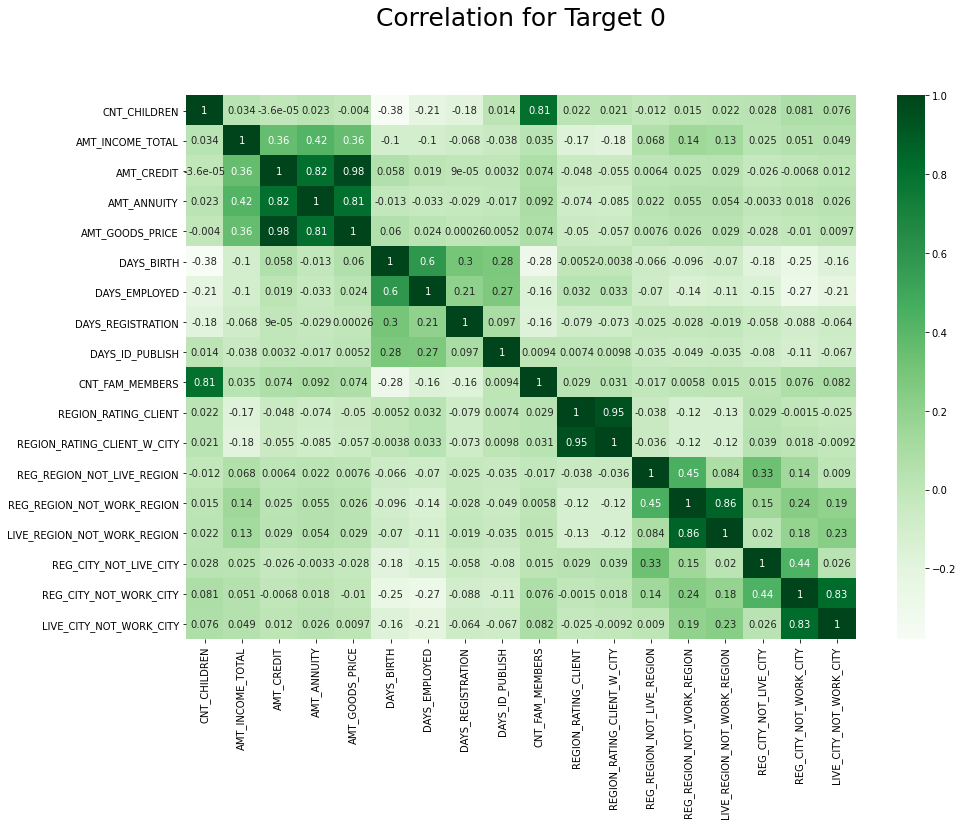

In [265]:
# Heat map for Target 0 showing correlations between all the variables
targets_corr(data=target0,title='Correlation for Target 0')

### Observations:

1. Credit amount is highly correlated with GoodsPrice as it means Credit amount is directly proportional with Goods Price.
2. Credit amount is also highly correlated with Annuity Amount as it means Credit amount is directly proportional with Annuity Amount.
3. Goods Price is also highly correlated with Annuity Amount as it means Goods Price is directly proportional with Annuity Amount.
4. Income amount is also highly correlated with Annuity Amount as it means Income amount is directly proportional with Annuity Amount.


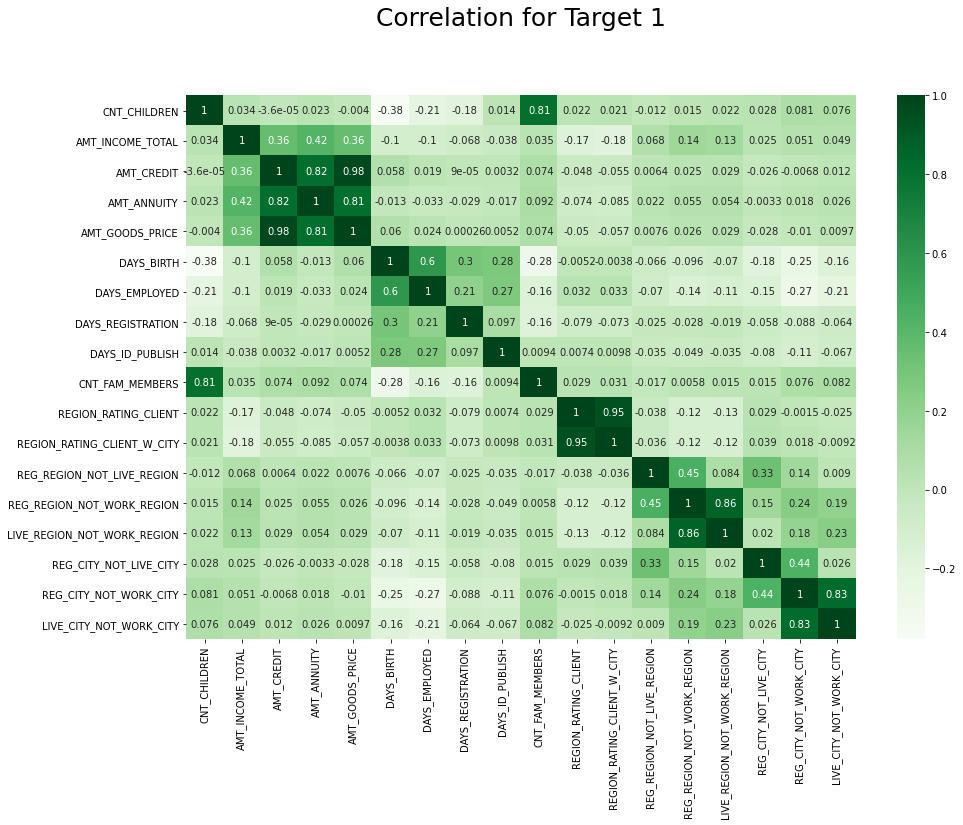

In [266]:
# Heat map for Target 1 showing correlations between all the variables
targets_corr(data=target1,title='Correlation for Target 1')

### Observations:

1. Credit amount is highly correlated with GoodsPrice as it means Credit amount is directly proportional with Goods Price.
2. Credit amount is also highly correlated with Annuity Amount as it means Credit amount is directly proportional with Annuity Amount.
3. Goods Price is also highly correlated with Annuity Amount as it means Goods Price is directly proportional with Annuity Amount.
4. Income amount is also highly correlated with Annuity Amount as it means Income amount is directly proportional with Annuity Amount.

##  Task 4: Reading the Previous application data

- ### Subtask 4.1: Reading previous Application Data.

In [290]:
# Reading the previous application data file provided and store it in a dataframe `df_prev_data`.

df_prev_data = pd.read_csv('previous_application.csv')

# Set option to display all the rows and colums without limit
pd.set_option('display.max_columns', None, 'display.max_rows', None)
df_prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


- ###  Subtask 4.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [291]:
# Checking the number of rows and columns in the dataframe
df_prev_data.shape

(1670214, 37)

In [292]:
# Check the summary for the columns
df_prev_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [293]:
# Check the column-wise null counts in the dataframe
df_prev_data.isnull().sum() 

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

## Task 5: Cleaning the Data

Now that we have loaded the dataset and inspected it, we will do the data cleansing. 

- ###  Subtask 5.1: Drop unnecessary columns

Drop columns that are not required for our analysis.

In [294]:
# Creating copy of original data frame 
df2 = df_prev_data

In [295]:
# Removing the columns which has null values more than 50%

nullcols=df2.isnull().sum()
nullcols=nullcols[nullcols.values>(0.5*len(nullcols))]
nullcols = list(nullcols[nullcols.values>=0.5].index)
df2.drop(labels=nullcols,axis=1,inplace=True)

In [296]:
# Check again the column-wise null counts in the dataframe
df2.isnull().sum() 

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     1
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
dtype: int64

- ###  Subtask 5.2: Detecting Outliers

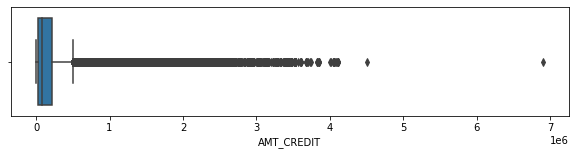

In [297]:
# Checking the outliers for AMT_CREDIT column
plt.figure(figsize=(10,2))
sns.boxplot(df2.AMT_CREDIT)
plt.show()

### Observations:

There are many outliers in the AMT_CREDIT column.

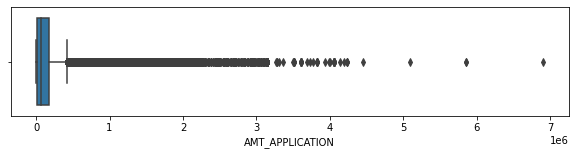

In [298]:
# Checking the outliers for AMT_APPLICATION column
plt.figure(figsize=(10,2))
sns.boxplot(df2.AMT_APPLICATION)
plt.show()

### Observations:

There are many outliers in the AMT_APPLICATION column.

## Task 6: Data Analysis for Previous application data

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

- ### Subtask 6.1 Univariate Analysis

In [299]:
# Define the function for plotting univariate countplot graphs
def plotUnivariatePrev(column):
    plt.figure(figsize=(15,7))           
    sns.countplot(column, data=df2)
    plt.title('Previous Application', fontsize=20) 
    plt.show()

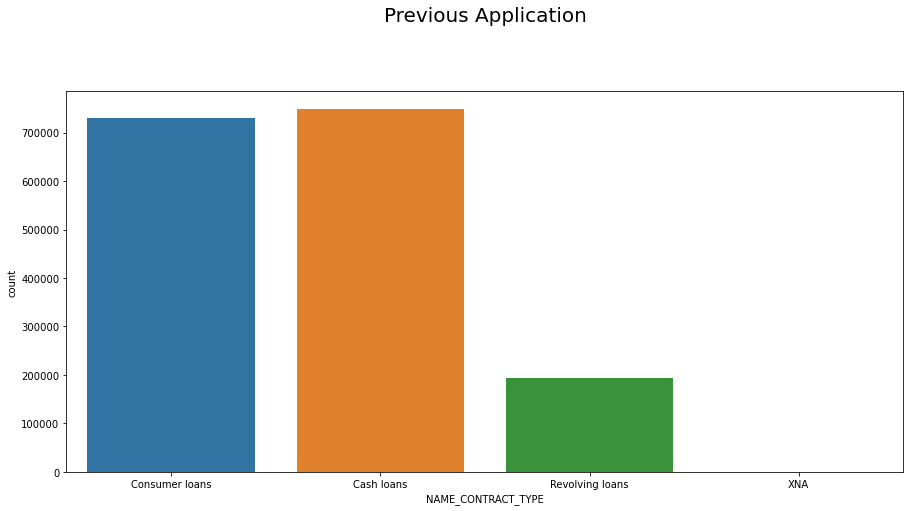

In [300]:
# Plot countplot for NAME_CONTRACT_TYPE column
plotUnivariatePrev('NAME_CONTRACT_TYPE')

### Observations:
1. People have opted the most for cash loan followed by consumer loans.
2. Revolving loans are the least taken contract type.

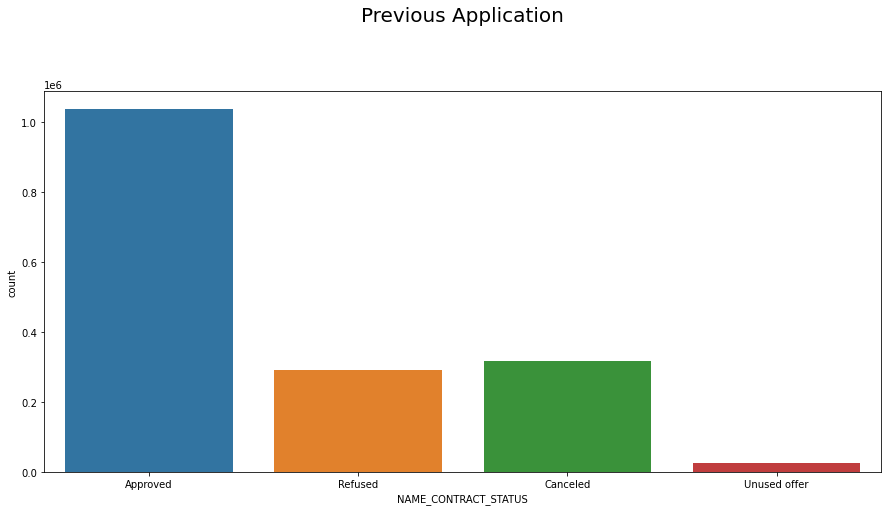

In [301]:
# Plot countplot for NAME_CONTRACT_STATUS column
plotUnivariatePrev('NAME_CONTRACT_STATUS')

### Observations:
1. The dataframe contains the most number of approved loans.
2. Least is the unused offer.

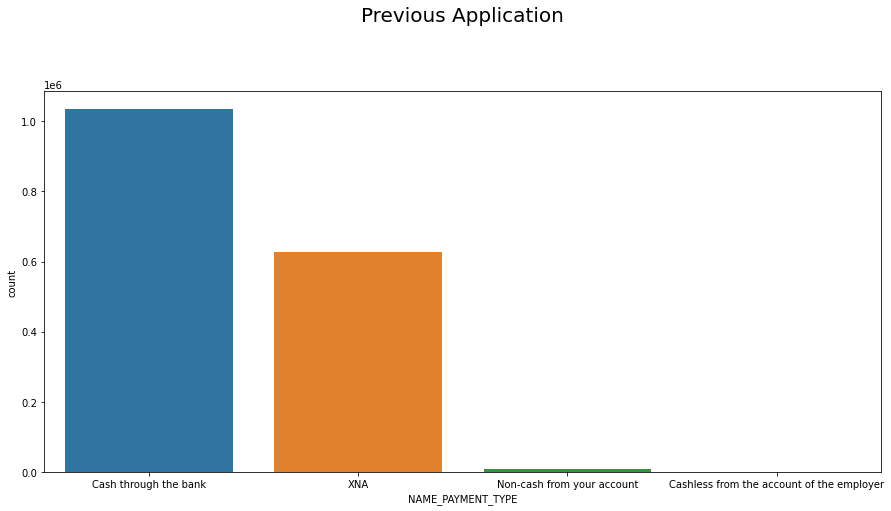

In [303]:
# Plot countplot for NAME_PAYMENT_TYPE column
plotUnivariatePrev('NAME_PAYMENT_TYPE')

### Observations:
1. The most popular payment type choosed is cash through the bank.

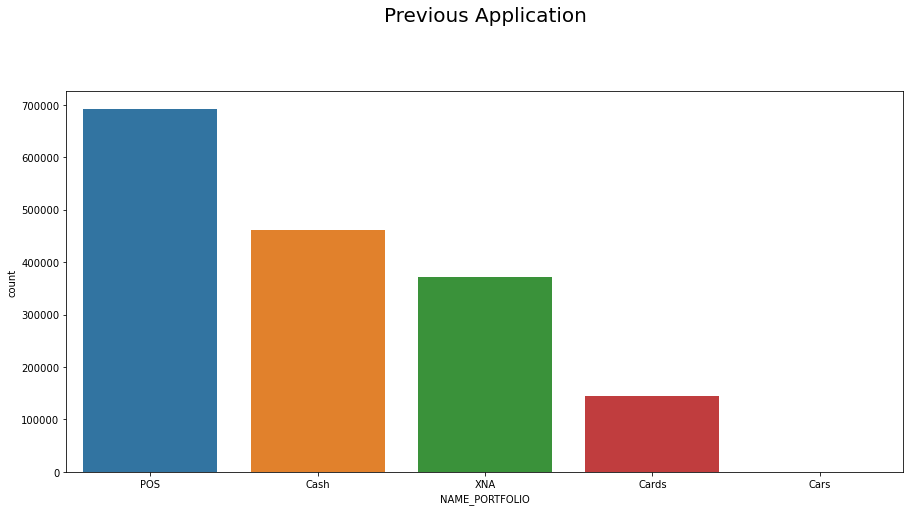

In [305]:
# Plot countplot for NAME_PORTFOLIO column
plotUnivariatePrev('NAME_PORTFOLIO')

### Observations:
1. Most number of applications are for POS(Point of sale) purpose followed by cash.
2. Cars is the least popular portfolio in this dataframe.


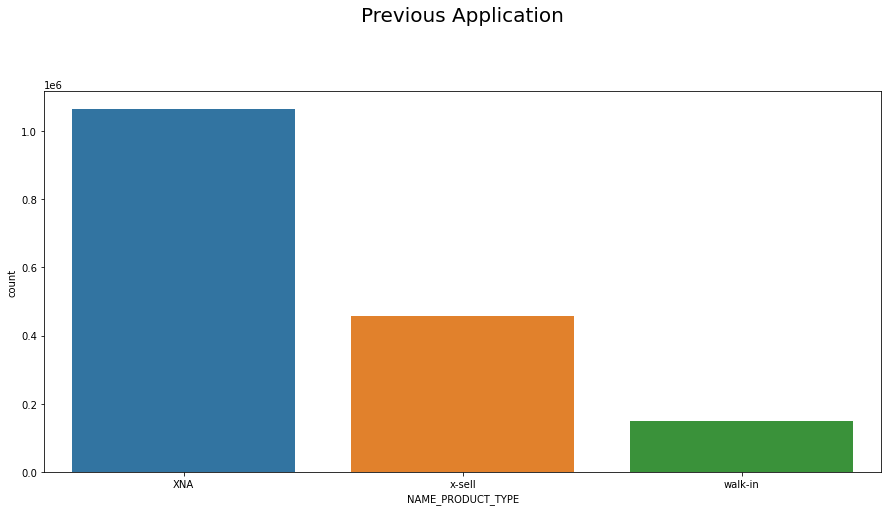

In [306]:
# Plot countplot for NAME_PRODUCT_TYPE column
plotUnivariatePrev('NAME_PRODUCT_TYPE')

### Observations:

1. There is a major unknown data in this column.
2. Among x-sell and walk-in, majority number of people have their product type as x-sell.

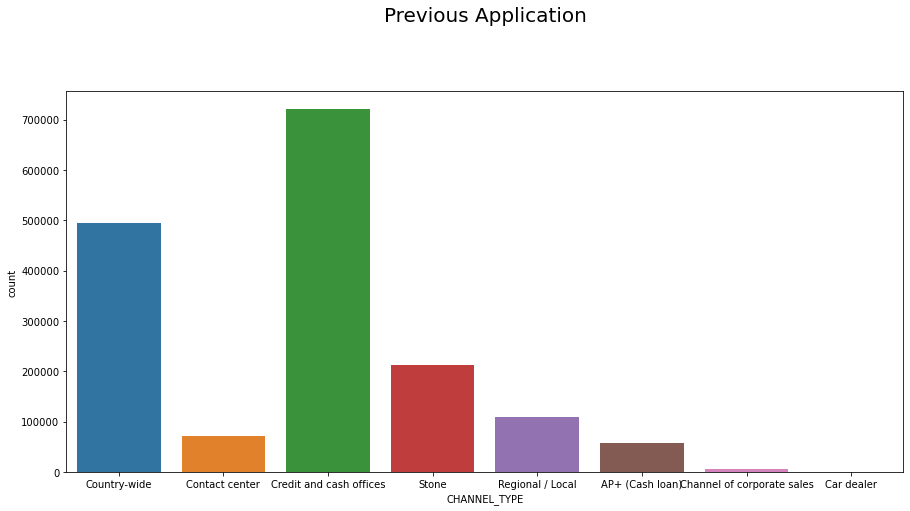

In [307]:
# Plot countplot for CHANNEL_TYPE column
plotUnivariatePrev('CHANNEL_TYPE')

### Observations:
1. Most number of clients are acquired through credit and cash offices followed by country-wise.
2. Car dealers and channel of corporate sales is the least preferred channel type.

- ### Subtask 6.2 Bivariate Analysis

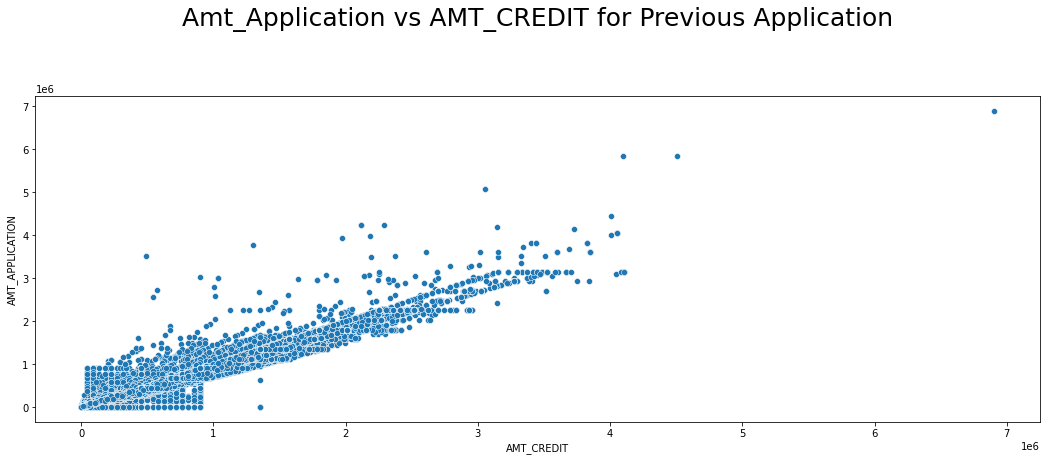

In [342]:
# Plot scatterplot for AMT_CREDIT vs AMT_APPLICATION columns
plt.figure(figsize=(18,6))
sns.scatterplot(x='AMT_CREDIT',y='AMT_APPLICATION',data=df2)
plt.title('Amt_Application vs AMT_CREDIT for Previous Application')
plt.show()

### Observations:
1. The graph is densely populated between 1000000 application amount and 1000000 credit amount.
2. We can also see that the application amount and credit amount has a positive correlation.

- ### Subtask 6.3 Correlation Heatmap

In [312]:
# Merge the application data and previous application data dataframes to analyse it further
Merged = df1.merge(df2,on='SK_ID_CURR',how='inner')
Merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,9461.0,637.0,3648.0,2120.0,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25,1038818,Consumer loans,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,low_normal
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765.0,1188.0,1186.0,291.0,Core staff,2.0,1,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,1810518,Cash loans,900000.0,1035882.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765.0,1188.0,1186.0,291.0,Core staff,2.0,1,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,2636178,Consumer loans,337500.0,348637.5,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,middle
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765.0,1188.0,1186.0,291.0,Core staff,2.0,1,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,2396755,Consumer loans,68809.5,68053.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,middle
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19046.0,225.0,4260.0,2531.0,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52,1564014,Consumer loans,24282.0,20106.0,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,middle


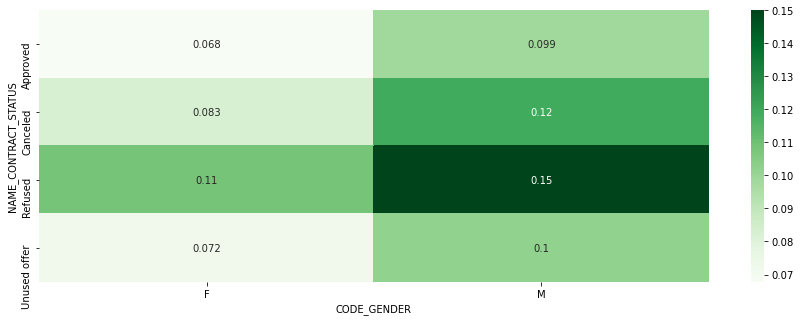

In [313]:
plt.figure(figsize=[15,5])
# Create a pivot table for calculating average of TARGET column for NAME_CONTRACT_STATUS vs CODE_GENDER column.
piv = pd.pivot_table(data=Merged, index="NAME_CONTRACT_STATUS", values="TARGET",columns=["CODE_GENDER"])
# Plot a heatmap based on the pivot table
sns.heatmap(data=piv,cmap="Greens",annot=True)
plt.show()

### Observations:
1. Male clients with Contract Status "Refused" are more likely to be defaulters.
2. In general, Male clients are more likely to be defaulters.


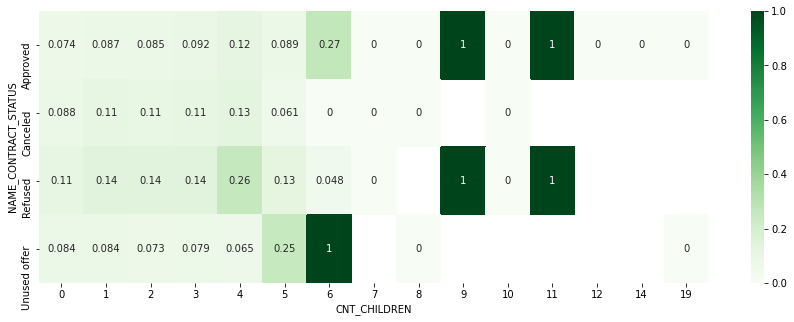

In [314]:
plt.figure(figsize=[15,5])
# Create a pivot table for calculating average of TARGET column for NAME_CONTRACT_STATUS vs CNT_CHILDREN column.
piv = pd.pivot_table(data=Merged, index="NAME_CONTRACT_STATUS", values="TARGET",columns=["CNT_CHILDREN"])
# Plot a heatmap based on the pivot table
sns.heatmap(data=piv,cmap="Greens",annot=True)
plt.show()

### Observations: 
1. Client with more number of children are more likely to be defaulters irrespective of the Contract Status.
2. Clients with 9 and 11 children are 100% likely to Default.
3. Clients with 6 Children and Contract Status "Unused Offer" are 100% likely to default.

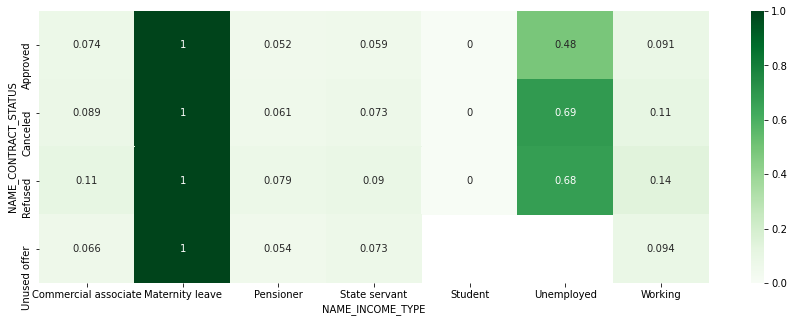

In [315]:
plt.figure(figsize=[15,5])
# Create a pivot table for calculating average of TARGET column for NAME_CONTRACT_STATUS vs NAME_INCOME_TYPE column.
piv = pd.pivot_table(data=Merged, index="NAME_CONTRACT_STATUS", values="TARGET",columns=["NAME_INCOME_TYPE"])
# Plot a heatmap based on the pivot table
sns.heatmap(data=piv,cmap="Greens",annot=True)
plt.show()

### Observations:

1. Client who are in Maternity Leave are 100% likely to Default irrespective of the Contract Status.
2. Clients who are Unemployed with Contract Status "Refused" or "Cancelled" are more likely to Default.
3. Student are less likely to Default in general.

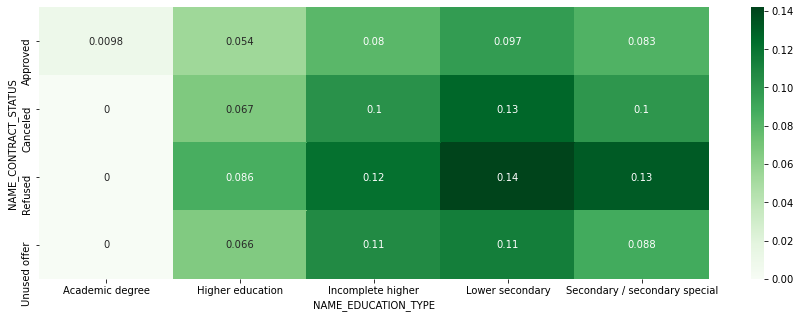

In [316]:
plt.figure(figsize=[15,5])
# Create a pivot table for calculating average of TARGET column for NAME_CONTRACT_STATUS vs NAME_EDUCATION_TYPE column.
piv = pd.pivot_table(data=Merged, index="NAME_CONTRACT_STATUS", values="TARGET",columns=["NAME_EDUCATION_TYPE"])
# Plot a heatmap based on the pivot table
sns.heatmap(data=piv,cmap="Greens",annot=True)
plt.show()

### Observations:

1. Client with incomplete Higher and Secondary /Secondary Special Education Type with "Refused" Contract Status are more likely to Default , Where as Clients with Education Type Lower Secondary are most Likely to Default.
2. Clients with Lower Secondary Education type has more defaulters compared to other Education Type.
3. Clients holding Academic Degree are less likely to default irrespective of Contract Status.

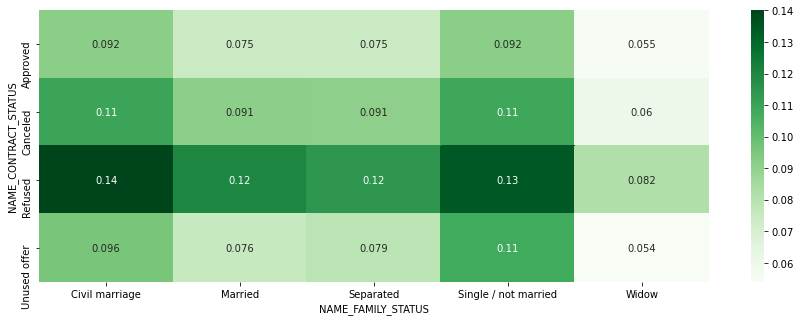

In [317]:
plt.figure(figsize=[15,5])
# Create a pivot table for calculating average of TARGET column for NAME_CONTRACT_STATUS vs NAME_FAMILY_STATUS column.
piv = pd.pivot_table(data=Merged, index="NAME_CONTRACT_STATUS", values="TARGET",columns=["NAME_FAMILY_STATUS"])
# Plot a heatmap based on the pivot table
sns.heatmap(data=piv,cmap="Greens",annot=True)
plt.show()

### Observations:
1. Clients with Contract Status "Refused" have more Defaulters for all the Family Status except "Widows" . Clients With Civil Marriage being the highest.
2. Clients who are Widows are less likely to default irrespective of the Contract Status.
3. Clients who are Single/Not Married or Civil Marriage are more likely to default for Contract Status "Cancelled".
4. Clients who are Single/Not Married are more likely to default for Contract Status "Unused Offer".

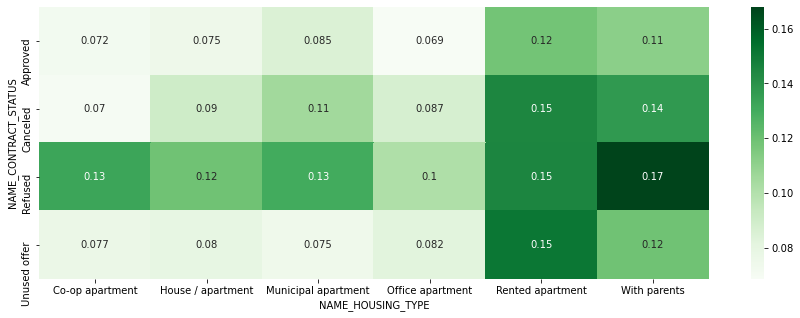

In [318]:
plt.figure(figsize=[15,5])
# Create a pivot table for calculating average of TARGET column for NAME_CONTRACT_STATUS vs NAME_HOUSING_TYPE column.
piv = pd.pivot_table(data=Merged, index="NAME_CONTRACT_STATUS", values="TARGET",columns=["NAME_HOUSING_TYPE"])
# Plot a heatmap based on the pivot table
sns.heatmap(data=piv,cmap="Greens",annot=True)
plt.show()

### Observations:
1. Clients with Parents and Contract Status "Refused" have more Defaulters.
2. Clients with Rented Apartment with Contract Status "Unused Offer", "Refused",
and "Cancelled" have more defaulters compared to "Approved".


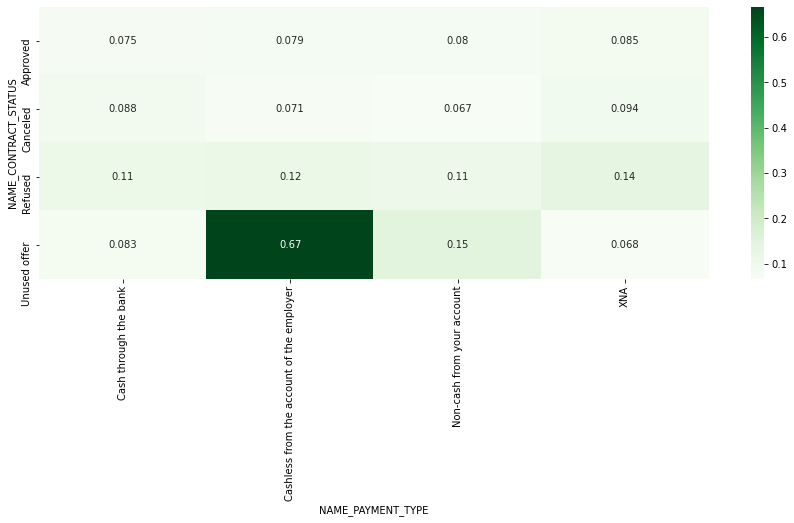

In [319]:
plt.figure(figsize=[15,5])
# Create a pivot table for calculating average of TARGET column for NAME_CONTRACT_STATUS vs NAME_PAYMENT_TYPE column.
piv = pd.pivot_table(data=Merged, index="NAME_CONTRACT_STATUS", values="TARGET",columns=["NAME_PAYMENT_TYPE"])
# Plot a heatmap based on the pivot table
sns.heatmap(data=piv,cmap="Greens",annot=True)
plt.show()

### Observations:

1. Clients who have "Cashless from the account of the employer" payment type Contract Status "Unused Offer" have more Defaulters.


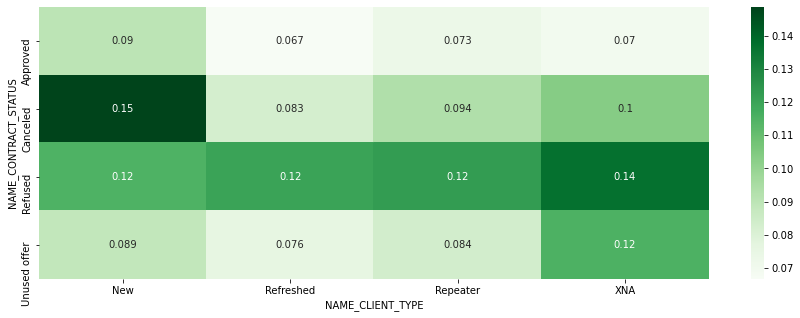

In [320]:
plt.figure(figsize=[15,5])
# Create a pivot table for calculating average of TARGET column for NAME_CONTRACT_STATUS vs NAME_CLIENT_TYPE column.
piv = pd.pivot_table(data=Merged, index="NAME_CONTRACT_STATUS", values="TARGET",columns=["NAME_CLIENT_TYPE"])
# Plot a heatmap based on the pivot table
sns.heatmap(data=piv,cmap="Greens",annot=True)
plt.show()

### Observations:

1. Clients who are new with Contract Status "Cancelled" have more Defaulters.
2. Clients with Contract Status "Refused" have more Defaulters irrespective of the Client Type.

# Conclusion

Thus, analysing both the application data and previous application data, we can conclude as follows:

Most preferred clients:

1. We can approach more to the students as they are less likely to default.
2. In terms of education we can prefer clients with academic degree over others as they are less likely to default.
3. Clients living in Co-Op housing appartments or living in their own house can be preferred as they are less likely to be a defaulter.
4. Clients whose previous application were approved are more preferable as they are less likely to default.



Less preferred clients:
1. Clients who have been refused for the loan before are more likely to be defaulters.
2. Clients with relatively more number of children are more likely to be defaulters.
3. Females on maternity leave are more likely to default.
4. Unemployed clients are more likely to be defaulters.
5. Clients with lower secondary/secondary education can be avoided as they are more likely to default.
6. Clients living in rented appartments are more likely to default followed by clients living with parents.
7.  It can be inferred that the male clients are more likely to be defaulters.
